# Animation Test 2019

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
ERREUR pas de cible optimale
22
ERREUR pas de cible optimale
23
24
25
26
evitement ok
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
evitement ok
45
evitement ok
46
47
48
49
50
51
52
53
ERREUR pas de cible optimale
54
55
ERREUR pas de cible optimale
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
evitement ok
77
78
79
80
81
82
83
84
85
ERREUR pas de cible optimale
86
ERREUR pas de cible optimale
87
ERREUR pas de cible optimale
88
ERREUR pas de cible optimale
89
ERREUR pas de cible optimale
90
ERREUR pas de cible optimale
91
ERREUR pas de cible optimale
92
ERREUR pas de cible optimale
93
ERREUR pas de cible optimale
94
ERREUR pas de cible optimale
95
ERREUR pas de cible optimale
96
ERREUR pas de cible optimale
97
ERREUR pas de cible optimale
98
ERREUR pas de cible optimale
99
ERREUR pas de cible optimale
100
ERREUR pas de cible optimale
101
102
103
104
----about to save---


<ipython-input-2-9f838c2d52ba>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


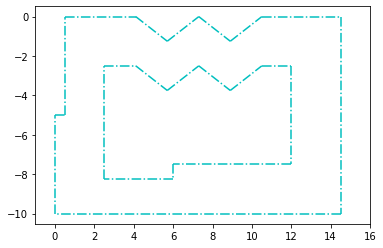

In [2]:
from trajectoire import *
from trajectoirearc import *


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

P=105 #110 # 1 tour =?
[traj1,traj2]=trajectoirearc(P)

x1=traj1[0]
y1=traj1[1]
yaw1=traj1[2]
cb1=traj1[3]

x2=traj2[0]
y2=traj2[1]
yaw2=traj2[2]
cb2=traj2[3]

obst=[]

[positioninit1,positioninit2,orientationinit1,orientationinit2,vinit1,vinit2,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alpha=pi+atan(larg/l)


i=0
while i<len(x1):
    x1[i]=x1[i]+rv*(cos(yaw1[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y1[i]=y1[i]+rv*(sin(yaw1[i]*2*pi/360+alpha))
    x2[i]=x2[i]+rv*(cos(yaw2[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y2[i]=y2[i]+rv*(sin(yaw2[i]*2*pi/360+alpha))
    obst.append(-9+1*sin(i*2*pi*0.2*deltat/1))
    i+=1

fig = plt.figure()
plt.axis('equal')

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c-.")
        j+=1
    i+=1

ax = fig.add_subplot(111)
ax.set_xlim(-1,16)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')
#obstacle = patches.Rectangle((0, 0), 0, 0, fc='b')
point1, = ax.plot([], [],'ko')
point2, = ax.plot([], [],'ro')

def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    #ax.add_patch(obstacle)
    point1.set_data([], [])
    point2.set_data([], [])

    return (patch1,patch2,point1,point2)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([x1[i], y1[i]])
    patch1.angle = yaw1[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([x2[i], y2[i]])
    patch2.angle = yaw2[i]
    #obstacle.set_width(0.5)
    #obstacle.set_height(0.5)
    #obstacle.set_xy([11,obst[i]])
    #obstacle.angle = 0
    point1.set_data(cb1[i][0], cb1[i][1])
    point2.set_data(cb2[i][0], cb2[i][1])
    return (patch1,patch2,point1,point2)#,obstacle

anim = animation.FuncAnimation(fig, animate,
                               init_func=init, 
                               frames=len(x1),
                               interval=100,
                               blit=True)
print("----about to save---")
anim
#anim.save('predictifvsPID.html', writer='ffmpeg', fps=10)
plt.show()

In [3]:
anim